### Load Modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import os 
import scipy.io
from scipy import stats
from __future__ import print_function
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd

## Load Matrices

In [2]:
test=scipy.io.loadmat('adni_connectome_aparc_length.mat')
aparcl=np.array(test['connectome_aparc0x2Baseg_length'])
print(aparcl.shape)

test=scipy.io.loadmat('adni_connectome_aparc_count.mat')
aparcc=np.array(test['connectome_aparc0x2Baseg_count'])
print(aparcc.shape)

test=scipy.io.loadmat('adni_connectome_aparc2009_length.mat')
aparc2l=np.array(test['connectome_aparc0x2Ea2009s0x2Baseg_length'])
print(aparc2l.shape)

test=scipy.io.loadmat('adni_connectome_aparc2009_count.mat')
aparc2c=np.array(test['connectome_aparc0x2Ea2009s0x2Baseg_count'])
print(aparc2c.shape)




(84, 84, 179)
(84, 84, 179)
(164, 164, 179)
(164, 164, 179)


## Zeropad smaller matrices, organized into X

In [3]:
zeromatal=np.zeros([164,164,179])
zeromatac=np.zeros([164,164,179])

zeromatal[40:124,40:124,:]=aparcl
zeromatac[40:124,40:124,:]=aparcc

aparcl=zeromatal
aparcc=zeromatac

X=np.zeros([164,164,179,4])
X[:,:,:,0]=aparcl
X[:,:,:,1]=aparcc
X[:,:,:,2]=aparc2l
X[:,:,:,3]=aparc2c

X=X.transpose([2,0,1,3])
print(X.shape)

(179, 164, 164, 4)


## Less matrix than subjects, grabbing respective labels into y

In [4]:
data=pd.read_csv('adni_data_1_mor.csv',header=0)
data=np.array(data)
datasubjid=data[:,0]
print(datasubjid.shape)
matsubjid=pd.read_csv('adni_connectome_subjectlist.csv',header=0)
matsubjid=np.array(matsubjid)
print(matsubjid.shape)

filtindex=np.isin(datasubjid,matsubjid)
filtindex=filtindex.ravel()
labels=data[:,13]
y=labels[filtindex]
print(y.shape)


(201,)
(179, 1)
(179,)


## Get index for X and y for experiment

In [5]:
# smi=1 , mci=2, ad=3

smiloc=np.asarray(np.where(y==1))
smiloc=np.ndarray.transpose(smiloc)
mciloc=np.asarray(np.where(y==2))
mciloc=np.ndarray.transpose(mciloc)
adloc=np.asarray(np.where(y==3))
adloc=np.ndarray.transpose(adloc)

#1v3, smi=0, ad=1
totalsize=len(smiloc)+len(adloc)
y_adsmi=np.zeros([totalsize])
X_adsmi=np.zeros([totalsize,164,164,4])
for i in range(len(smiloc)):
    y_adsmi[i]=0
    X_adsmi[i,:,:,:]=X[smiloc[i],:,:,:]
for j in range(len(adloc)):
    y_adsmi[len(smiloc)+j]=1
    X_adsmi[len(smiloc)+j,:,:,:]=X[adloc[j],:,:,:]
print(y_adsmi.shape)
print(X_adsmi.shape)

#1v2, smi=0, mci=1
totalsize=len(smiloc)+len(mciloc)
y_mcismi=np.zeros([totalsize])
X_mcismi=np.zeros([totalsize,164,164,4])
for i in range(len(smiloc)):
    y_mcismi[i]=0
    X_mcismi[i,:,:,:]=X[smiloc[i],:,:,:]
for j in range(len(mciloc)):
    y_mcismi[len(smiloc)+j]=1
    X_mcismi[len(smiloc)+j,:,:,:]=X[mciloc[j],:,:,:]
print(y_mcismi.shape)
print(X_mcismi.shape)

#2v3, mci=0, ad=1
totalsize=len(mciloc)+len(adloc)
y_admci=np.zeros([totalsize])
X_admci=np.zeros([totalsize,164,164,4])
for i in range(len(mciloc)):
    y_admci[i]=0
    X_admci[i,:,:,:]=X[mciloc[i],:,:,:]
for j in range(len(adloc)):
    y_admci[len(mciloc)+j]=1
    X_admci[len(mciloc)+j,:,:,:]=X[adloc[j],:,:,:]
print(y_admci.shape)
print(X_admci.shape)




(119,)
(119, 164, 164, 4)
(131,)
(131, 164, 164, 4)
(108,)
(108, 164, 164, 4)


## Run CNN with 5fold CV for AD_SMI

Number of training points:  (94,)
Number of testing points:  (25,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 72.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 72.0. Model named cnn_1522258947.


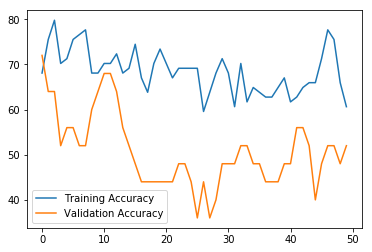

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 29.16666666666667%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 41.666666666666664%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
Best validation accuracy! iteration:414 accuracy: 45.833333333333336%
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 45.833333333333336. Model named cnn_1522259007.


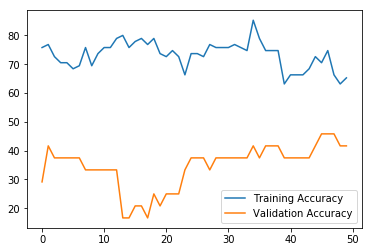

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 66.66666666666666%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:81 accuracy: 70.83333333333333%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:135 accuracy: 75.0%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
Best validation accuracy! iteration:306 accuracy: 83.33333333333333%
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 83.3333333

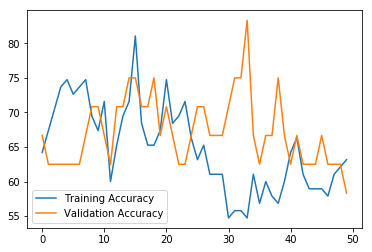

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 52.17391304347826%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
Best validation accuracy! iteration:189 accuracy: 56.52173913043478%
epoch 22 
epoch 23 
Best validation accuracy! iteration:207 accuracy: 69.56521739130434%
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 69.56521739130434. Model named cnn_1522259136.


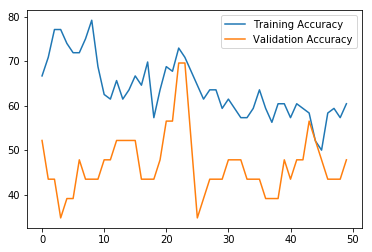

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 65.21739130434783%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:54 accuracy: 69.56521739130434%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 69.56521739130434. Model named cnn_1522259200.


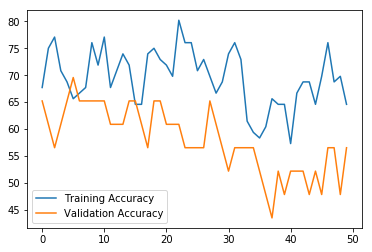

Number of training points:  (94,)
Number of testing points:  (25,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 56.0%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 60.0%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:81 accuracy: 64.0%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 64.0. Model named cnn_1522259263.


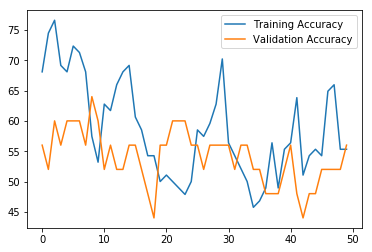

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 62.5%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 66.66666666666666%
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 70.83333333333333%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:126 accuracy: 75.0%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
Best validation accuracy! iteration:306 accuracy: 79.16666666666667%
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 

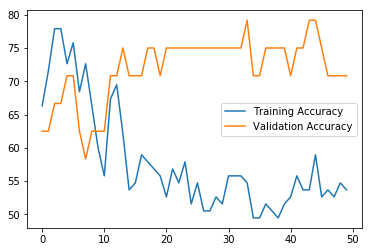

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 45.833333333333336%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 50.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
Best validation accuracy! iteration:315 accuracy: 54.166666666666664%
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
Best validation accuracy! iteration:405 accuracy: 58.333333333333336%
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 58.3333

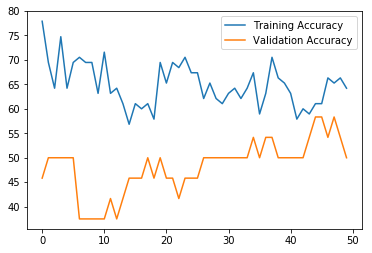

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 47.82608695652174%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:90 accuracy: 52.17391304347826%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:216 accuracy: 56.52173913043478%
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 56.52173913043478. Model named cnn_1522259457.


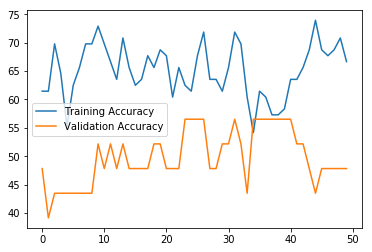

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 65.21739130434783%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:72 accuracy: 69.56521739130434%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:216 accuracy: 73.91304347826087%
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 73.91304347826087. Model named cnn_1522259520.


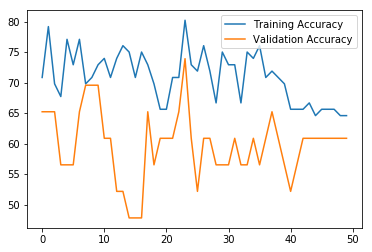

Number of training points:  (94,)
Number of testing points:  (25,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 44.0%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 56.0%
epoch 3 
Best validation accuracy! iteration:27 accuracy: 64.0%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 64.0. Model named cnn_1522259585.


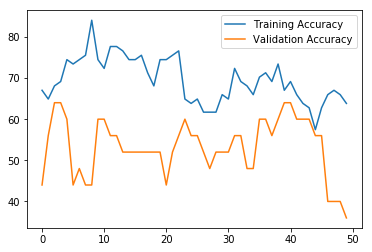

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 45.833333333333336%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 50.0%
epoch 6 
Best validation accuracy! iteration:54 accuracy: 54.166666666666664%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 54.166666666666664. Model named cnn_1522259648.


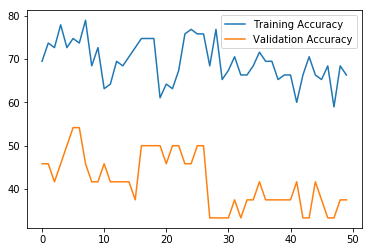

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 66.66666666666666%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 75.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 75.0. Model named cnn_1522259712.


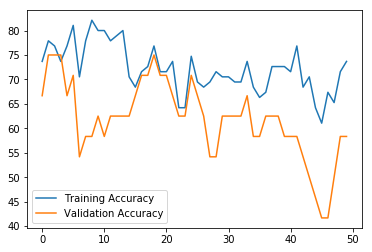

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 52.17391304347826%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 56.52173913043478%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:108 accuracy: 60.869565217391305%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
Best validation accuracy! iteration:189 accuracy: 65.21739130434783%
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy

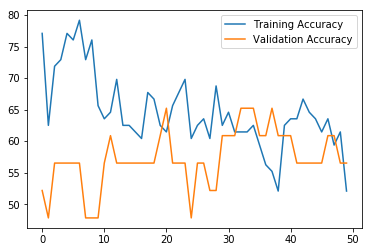

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 30.434782608695656%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 47.82608695652174%
epoch 3 
Best validation accuracy! iteration:27 accuracy: 56.52173913043478%
epoch 4 
Best validation accuracy! iteration:36 accuracy: 60.869565217391305%
epoch 5 
epoch 6 
Best validation accuracy! iteration:54 accuracy: 65.21739130434783%
epoch 7 
Best validation accuracy! iteration:63 accuracy: 69.56521739130434%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
ep

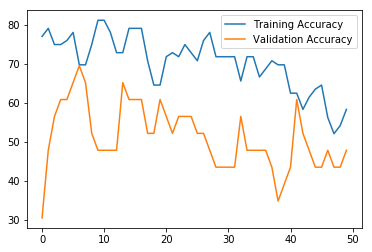

Number of training points:  (94,)
Number of testing points:  (25,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 80.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 80.0. Model named cnn_1522259908.


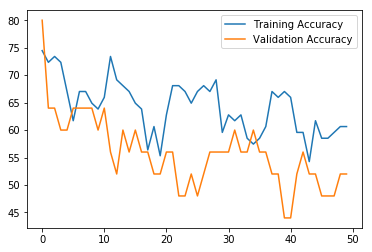

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 45.833333333333336%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 50.0%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:90 accuracy: 54.166666666666664%
epoch 11 
Best validation accuracy! iteration:99 accuracy: 58.333333333333336%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:135 accuracy: 66.66666666666666%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
e

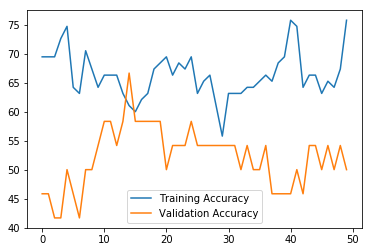

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 45.833333333333336%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 54.166666666666664%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
Best validation accuracy! iteration:225 accuracy: 58.333333333333336%
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 58.333333333333336. Model named cnn_1522260034.


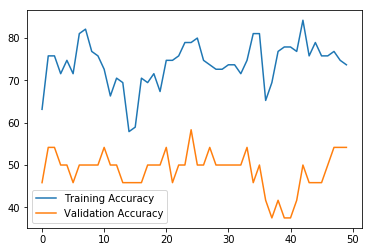

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 43.47826086956522%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 47.82608695652174%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 56.52173913043478%
epoch 6 
epoch 7 
Best validation accuracy! iteration:63 accuracy: 60.869565217391305%
epoch 8 
epoch 9 
Best validation accuracy! iteration:81 accuracy: 69.56521739130434%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
e

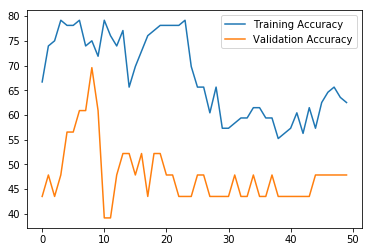

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 56.52173913043478%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:108 accuracy: 60.869565217391305%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 60.869565217391305. Model named cnn_1522260165.


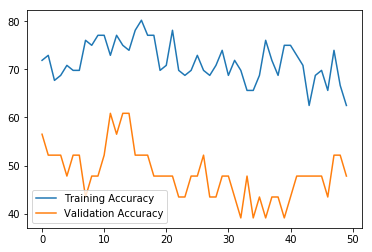

Number of training points:  (94,)
Number of testing points:  (25,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 72.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:63 accuracy: 76.0%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 76.0. Model named cnn_1522260228.


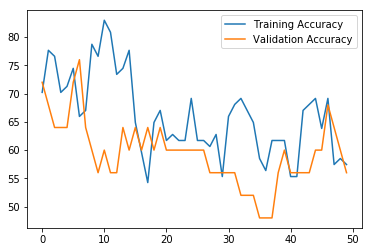

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 62.5%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
Best validation accuracy! iteration:252 accuracy: 66.66666666666666%
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
Best validation accuracy! iteration:324 accuracy: 79.16666666666667%
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 79.16666666666667. Model named cnn_1522260293.


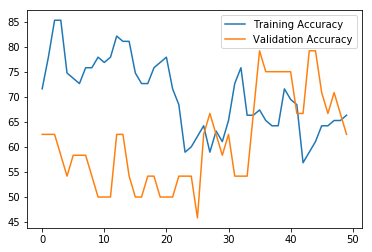

Number of training points:  (95,)
Number of testing points:  (24,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 41.666666666666664%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:171 accuracy: 45.833333333333336%
epoch 20 
Best validation accuracy! iteration:180 accuracy: 50.0%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
Best validation accuracy! iteration:396 accuracy: 54.166666666666664%
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 54.166

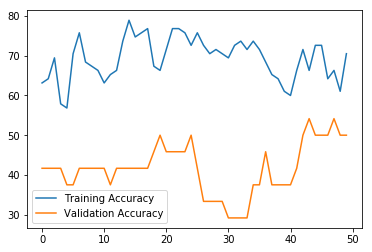

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 56.52173913043478%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:81 accuracy: 60.869565217391305%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
Best validation accuracy! iteration:279 accuracy: 65.21739130434783%
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
Best validation accuracy! iteration:342 accuracy: 69.56521739130434%
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy

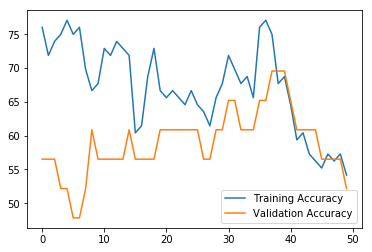

Number of training points:  (96,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 69.56521739130434%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 69.56521739130434. Model named cnn_1522260486.


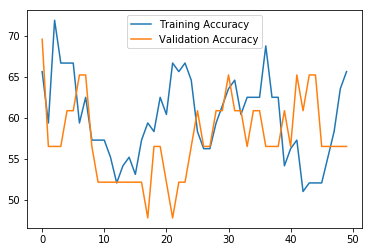

AD_SMI average accuracy is:  67.3631884057971
AD_SMI standard deviation is:  9.12603259875225


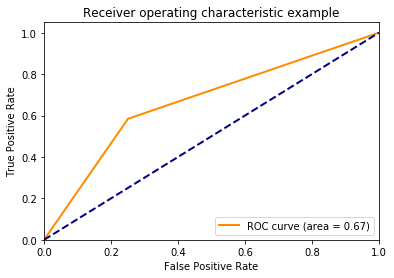

In [15]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_test import cnn_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(X_adsmi,y_adsmi):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=X_adsmi[train_index],X_adsmi[test_index]
    y_train,y_test=y_adsmi[train_index],y_adsmi[test_index]
    mask_train = np.random.choice(len(X_train),len(X_train), replace=False)
    X_train=X_train[mask_train,:,:,:]
    y_train=y_train[mask_train,]
    
    
    #preprocess X
    #meanimage=np.mean(X_train,axis=(0,1,2,3))
    #X_train=X_train.astype(np.float32)-meanimage.astype(np.float32)
    #X_test=X_test.astype(np.float32)-meanimage.astype(np.float32)
    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=cnn_training(X_train,y_train,X_test,y_test,fc_units=[3000,1000,2], 
                 conv_featmap=[6,8,10],l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=50,batch_size=10,imglen=164)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print('AD_SMI average accuracy is: ',mean_acc)
print('AD_SMI standard deviation is: ',mean_std)

fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/ADNI_ADSMI_ROC_curve_CNN.jpg')
plt.show()

## Run CNN with 5fold CV for MCI_SMI

Number of training points:  (104,)
Number of testing points:  (27,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 40.74074074074074%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 44.44444444444444%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:70 accuracy: 48.148148148148145%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:110 accuracy: 51.851851851851855%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:190 accuracy: 59.25925925925926%
epoch 20 
epoch 21 
epoch 22 
Best validation accuracy! iteration:220 accuracy: 62.96296296296296%
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 

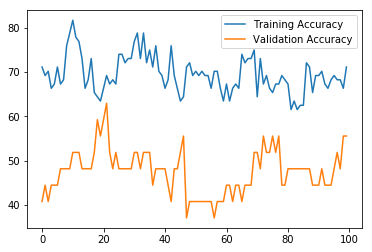

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 57.69230769230769%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 61.53846153846154%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
Best validation accuracy! iteration:610 accuracy: 65.3846153846

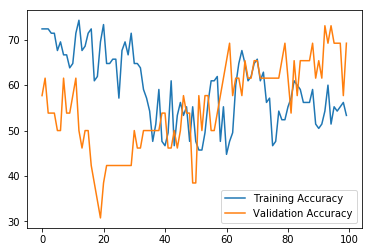

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 61.53846153846154%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 69.23076923076923%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:50 accuracy: 73.07692307692308%
epoch 6 
epoch 7 
Best validation accuracy! iteration:70 accuracy: 76.92307692307692%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 5

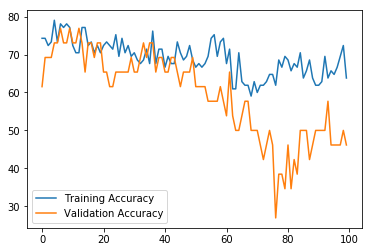

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 50.0%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:40 accuracy: 57.69230769230769%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 

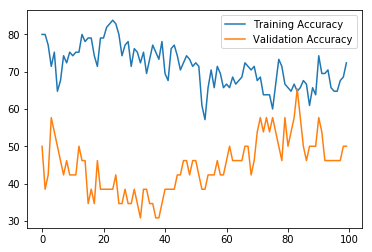

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 65.38461538461539%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
Best validation accuracy! itera

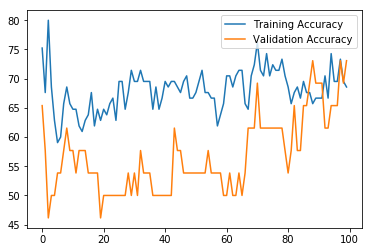

Number of training points:  (104,)
Number of testing points:  (27,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 59.25925925925926%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:60 accuracy: 62.96296296296296%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:120 accuracy: 74.07407407407408%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoc

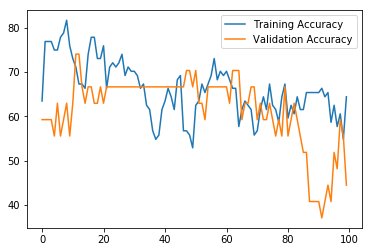

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 46.15384615384615%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:140 accuracy: 53.84615384615385%
epoch 15 
Best validation accuracy! iteration:150 accuracy: 57.69230769230769%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
Best validation accuracy! iteration:400 accuracy: 61.53846153846154%
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoc

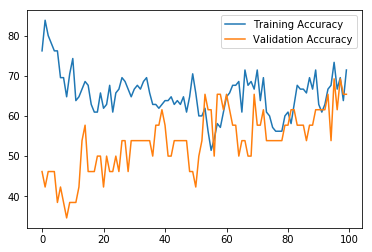

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 53.84615384615385%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:60 accuracy: 57.69230769230769%
epoch 7 
Best validation accuracy! iteration:70 accuracy: 65.38461538461539%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:160 accuracy: 69.23076923076923%
epoch 17 
Best validation accuracy! iteration:170 accuracy: 76.92307692307692%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 4

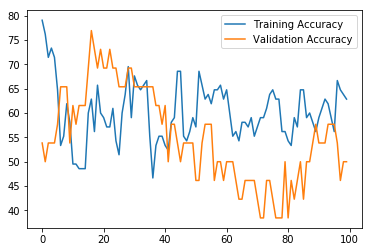

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 46.15384615384615%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:120 accuracy: 53.84615384615385%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
ep

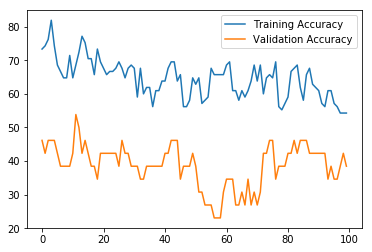

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 26.92307692307692%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 30.769230769230774%
epoch 3 
Best validation accuracy! iteration:30 accuracy: 34.61538461538461%
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:60 accuracy: 42.30769230769231%
epoch 7 
Best validation accuracy! iteration:70 accuracy: 46.15384615384615%
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:100 accuracy: 50.0%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:140 accuracy: 53.84615384615385%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epo

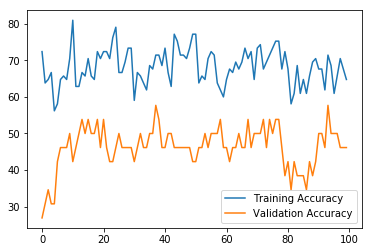

Number of training points:  (104,)
Number of testing points:  (27,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 48.148148148148145%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:120 accuracy: 51.851851851851855%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
Best validation accuracy! iteration:350 accuracy: 55.55555555555556%
epoch 36 
epoch 37 
epoch 38 
epoch 39 
Best validation accuracy! iteration:390 accuracy: 62.96296296296296%
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
ep

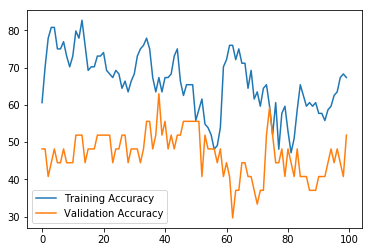

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 42.30769230769231%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 50.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:60 accuracy: 57.69230769230769%
epoch 7 
Best validation accuracy! iteration:70 accuracy: 61.53846153846154%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
Best validation accuracy! iteration:230 accuracy: 65.38461538461539%
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
e

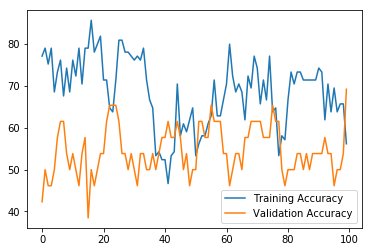

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 53.84615384615385%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 57.69230769230769%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:140 accuracy: 61.53846153846154%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Best validation accuracy! iteration:200 accuracy: 69.23076923076923%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch

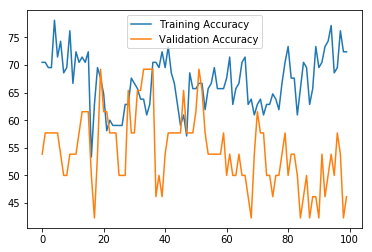

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 57.69230769230769%
epoch 2 
Best validation accuracy! iteration:20 accuracy: 61.53846153846154%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:80 accuracy: 65.38461538461539%
epoch 9 
Best validation accuracy! iteration:90 accuracy: 73.07692307692308%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 5

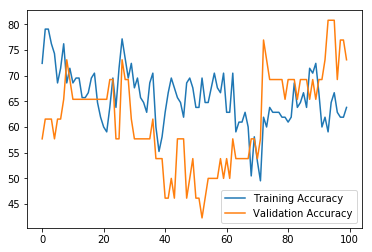

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 61.53846153846154%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:70 accuracy: 65.38461538461539%
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:100 accuracy: 73.07692307692308%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoc

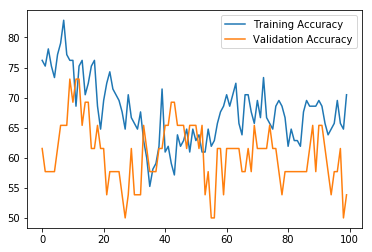

Number of training points:  (104,)
Number of testing points:  (27,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 59.25925925925926%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
e

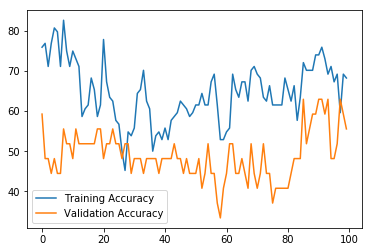

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 57.69230769230769%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:70 accuracy: 61.53846153846154%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
Best validation accuracy! iteration:230 accuracy: 69.23076923076923%
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoc

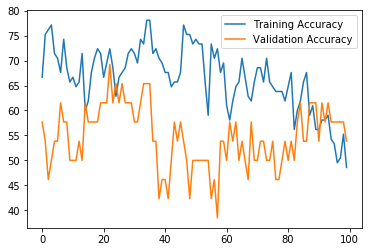

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 50.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
Best validation accuracy! iteration:300 accuracy: 53.84615384615385%
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
Best validation accuracy! iteration:350 accuracy: 57.69230769230769%
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 

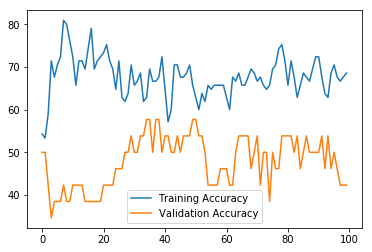

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 73.07692307692308%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
e

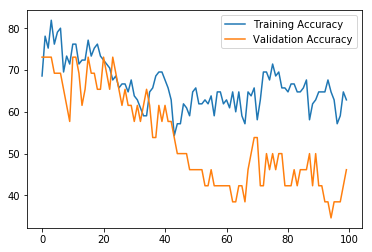

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 53.84615384615385%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:100 accuracy: 65.38461538461539%
epoch 11 
Best validation accuracy! iteration:110 accuracy: 73.07692307692308%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
Best validation accuracy! iteration:360 accuracy: 76.92307692307692%
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoc

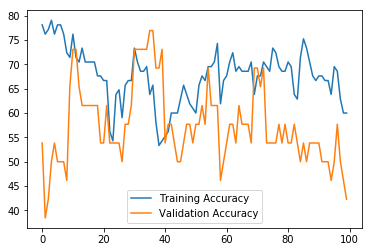

Number of training points:  (104,)
Number of testing points:  (27,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 55.55555555555556%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:80 accuracy: 59.25925925925926%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:150 accuracy: 62.96296296296296%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoc

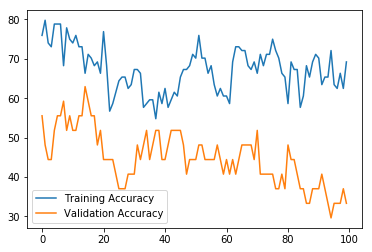

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 61.53846153846154%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
e

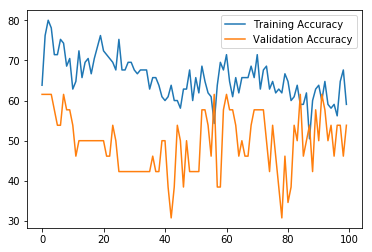

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 65.38461538461539%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Best validation accuracy! iteration:200 accuracy: 73.07692307692308%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
ep

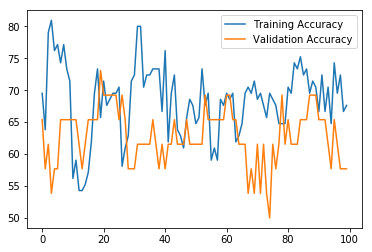

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 53.84615384615385%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:110 accuracy: 57.69230769230769%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
Best validation accuracy! iteration:220 accuracy: 61.53846153846154%
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epo

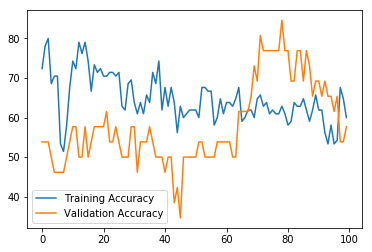

Number of training points:  (105,)
Number of testing points:  (26,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 10
epoch 1 
Best validation accuracy! iteration:10 accuracy: 50.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:60 accuracy: 53.84615384615385%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:100 accuracy: 57.69230769230769%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:170 accuracy: 65.38461538461539%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
Best validation accuracy! iteration:310 accuracy: 69.23076923076923%
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
Best validation accuracy! iteration:370 accuracy: 73.07692307692308%
epoch 38 
epoch 39 
epoch 40 
epoch 41 


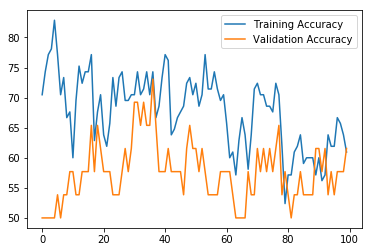

MCI_SMI average accuracy is:  69.34472934472934
MCI_SMI standard deviation is:  7.46536606533968


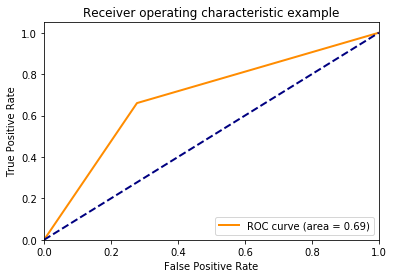

In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_test import cnn_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(X_mcismi,y_mcismi):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=X_mcismi[train_index],X_mcismi[test_index]
    y_train,y_test=y_mcismi[train_index],y_mcismi[test_index]
    mask_train = np.random.choice(len(X_train),len(X_train), replace=False)
    X_train=X_train[mask_train,:,:,:]
    y_train=y_train[mask_train,]
    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=cnn_training(X_train,y_train,X_test,y_test,fc_units=[3000,1000,2], 
                 conv_featmap=[6,10,16],l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=100,batch_size=10,imglen=164)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print('MCI_SMI average accuracy is: ',mean_acc)
print('MCI_SMI standard deviation is: ',mean_std)

fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/ADNI_MCISMI_ROC_curve_CNN.jpg')
plt.show()

## Run CNN with 5fold CV for AD_MCI

C:\Users\choyale\AppData\Local\Continuum\miniconda3\envs\tfpls\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 68.18181818181819%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoc

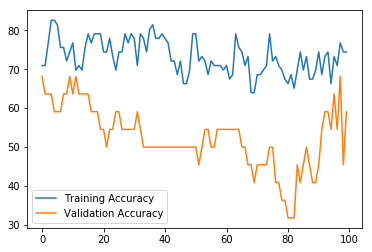

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 45.45454545454545%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 54.54545454545455%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:80 accuracy: 59.09090909090909%
epoch 11 
epoch 12 
Best validation accuracy! iteration:96 accuracy: 63.63636363636363%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 


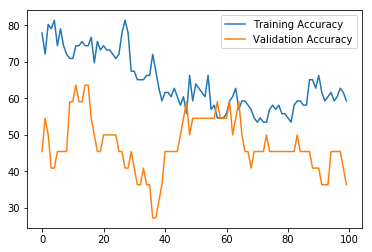

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 63.63636363636363%
epoch 2 
epoch 3 
Best validation accuracy! iteration:24 accuracy: 68.18181818181819%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
Best validation accuracy! iteration:248 accuracy: 72.72727272727272%
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
Best validation accuracy! iteration:344 accuracy: 77.27272727272728%
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54

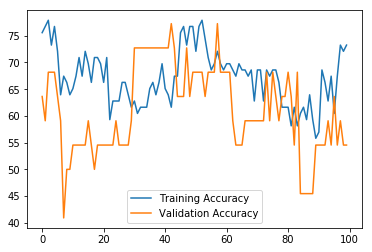

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 52.38095238095238%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 61.904761904761905%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:56 accuracy: 66.66666666666666%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:128 accuracy: 71.42857142857143%
epoch 17 
Best validation accuracy! iteration:136 accuracy: 76.19047619047619%
epoch 18 
epoch 19 
epoch 20 
Best validation accuracy! iteration:160 accuracy: 80.95238095238095%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 


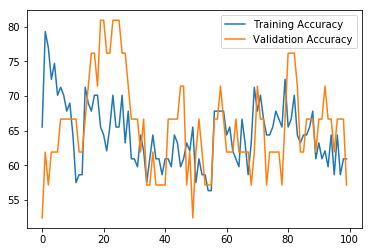

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 47.61904761904762%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:32 accuracy: 52.38095238095238%
epoch 5 
Best validation accuracy! iteration:40 accuracy: 57.142857142857146%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:72 accuracy: 61.904761904761905%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54

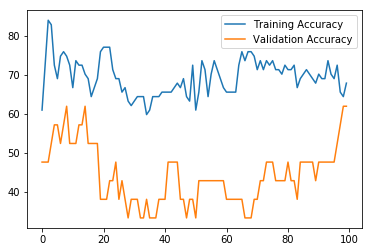

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 59.09090909090909%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 63.63636363636363%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:88 accuracy: 68.18181818181819%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
Best validation accuracy! iteration:224 accuracy: 72.72727272727272%
epoch 29 
epoch 30 
Best validation accuracy! iteration:240 accuracy: 77.27272727272728%
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 


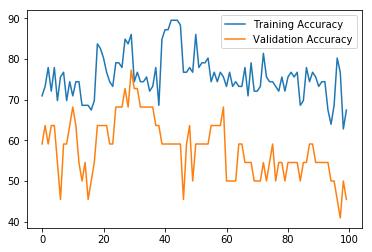

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 45.45454545454545%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 50.0%
epoch 3 
epoch 4 
Best validation accuracy! iteration:32 accuracy: 59.09090909090909%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:192 accuracy: 63.63636363636363%
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
ep

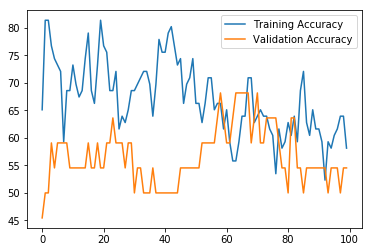

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 59.09090909090909%
epoch 2 
epoch 3 
Best validation accuracy! iteration:24 accuracy: 63.63636363636363%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:64 accuracy: 68.18181818181819%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61

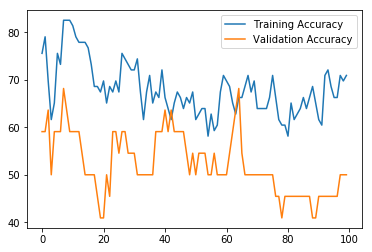

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 52.38095238095238%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 61.904761904761905%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:56 accuracy: 66.66666666666666%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 6

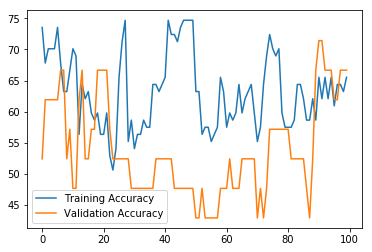

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 57.142857142857146%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 66.66666666666666%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:96 accuracy: 71.42857142857143%
epoch 13 
epoch 14 
Best validation accuracy! iteration:112 accuracy: 80.95238095238095%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54

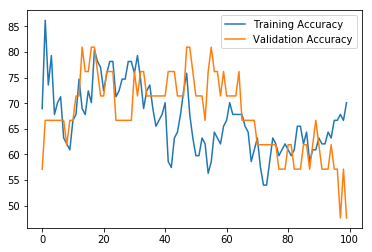

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 54.54545454545455%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:72 accuracy: 59.09090909090909%
epoch 10 
Best validation accuracy! iteration:80 accuracy: 63.63636363636363%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:136 accuracy: 68.18181818181819%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 

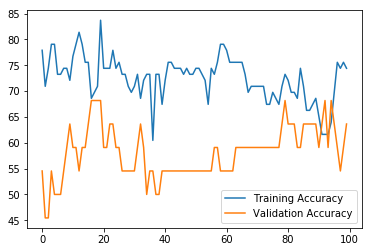

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 68.18181818181819%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
epoc

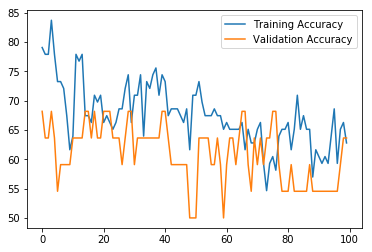

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 40.90909090909091%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 45.45454545454545%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:40 accuracy: 50.0%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:120 accuracy: 54.54545454545455%
epoch 16 
Best validation accuracy! iteration:128 accuracy: 59.09090909090909%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epo

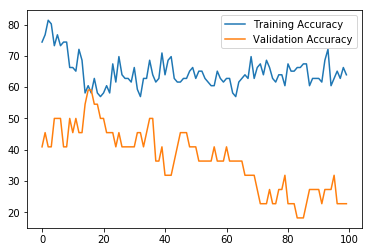

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 38.095238095238095%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 42.857142857142854%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:56 accuracy: 47.61904761904762%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:104 accuracy: 52.38095238095238%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:152 accuracy: 57.142857142857146%
epoch 20 
Best validation accuracy! iteration:160 accuracy: 71.42857142857143%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40

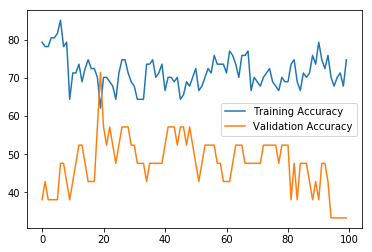

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 61.904761904761905%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 76.19047619047619%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch

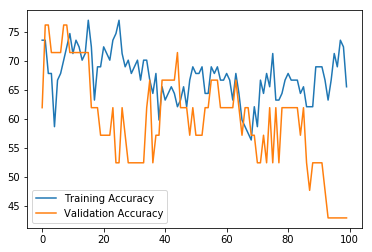

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 50.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:40 accuracy: 59.09090909090909%
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:64 accuracy: 63.63636363636363%
epoch 9 
epoch 10 
Best validation accuracy! iteration:80 accuracy: 68.18181818181819%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
Best validation accuracy! iteration:168 accuracy: 72.72727272727272%
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoc

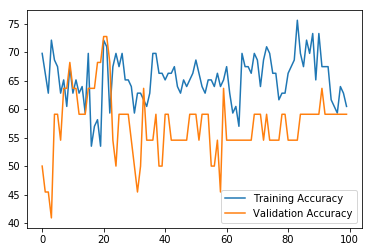

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 54.54545454545455%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 59.09090909090909%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
Best validation accuracy! iteration:240 accuracy: 63.63636363636363%
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
Best validation accuracy! iteration:376 accuracy: 68.18181818181819%
epoch 48 
epoch 49 
epoch 50 
epoch 51 
Best validation accuracy! it

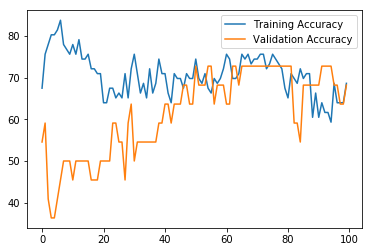

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 45.45454545454545%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 54.54545454545455%
epoch 3 
Best validation accuracy! iteration:24 accuracy: 63.63636363636363%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61

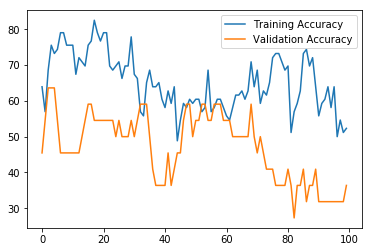

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 28.57142857142857%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 42.857142857142854%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:128 accuracy: 52.38095238095238%
epoch 17 
Best validation accuracy! iteration:136 accuracy: 57.142857142857146%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
Best validation accuracy! iteration:216 accuracy: 61.904761904761905%
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 

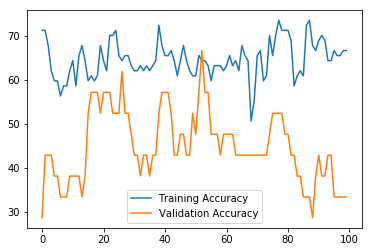

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 57.142857142857146%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:192 accuracy: 61.904761904761905%
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
Best validation accuracy! iteration:352 accuracy: 66.66666666666666%
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoc

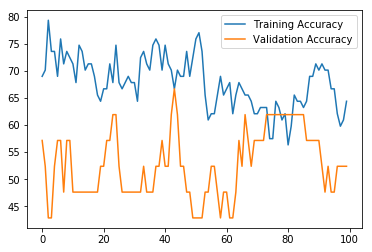

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 63.63636363636363%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 77.27272727272728%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 

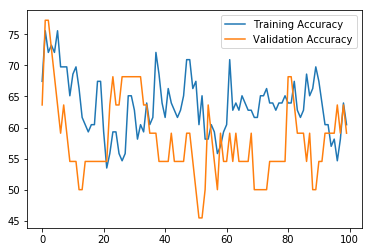

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 50.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:72 accuracy: 54.54545454545455%
epoch 10 
epoch 11 
Best validation accuracy! iteration:88 accuracy: 63.63636363636363%
epoch 12 
epoch 13 
Best validation accuracy! iteration:104 accuracy: 68.18181818181819%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
ep

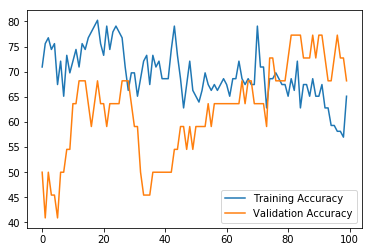

Number of training points:  (86,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 45.45454545454545%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:48 accuracy: 50.0%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
Best validation accuracy! iteration:208 accuracy: 63.63636363636363%
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
Best validation accuracy! iter

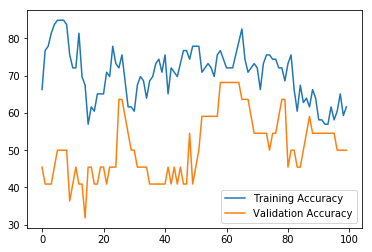

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 52.38095238095238%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 61.904761904761905%
epoch 3 
Best validation accuracy! iteration:24 accuracy: 66.66666666666666%
epoch 4 
Best validation accuracy! iteration:32 accuracy: 71.42857142857143%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
Best validation accuracy! iteration:200 accuracy: 76.19047619047619%
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 


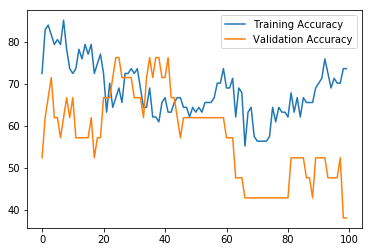

Number of training points:  (87,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 8
epoch 1 
Best validation accuracy! iteration:8 accuracy: 57.142857142857146%
epoch 2 
Best validation accuracy! iteration:16 accuracy: 61.904761904761905%
epoch 3 
epoch 4 
Best validation accuracy! iteration:32 accuracy: 66.66666666666666%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 

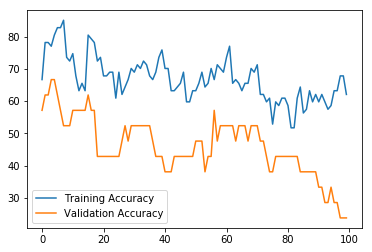

AD_MCI average accuracy is:  70.76190476190476
AD_MCI standard deviation is:  5.835305146663906


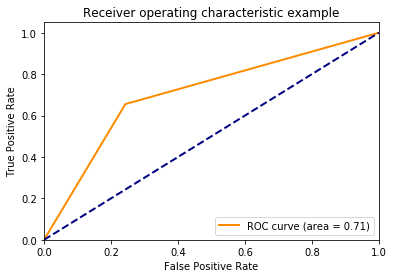

In [6]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_test import cnn_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(X_admci,y_admci):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=X_admci[train_index],X_admci[test_index]
    y_train,y_test=y_admci[train_index],y_admci[test_index]
    mask_train = np.random.choice(len(X_train),len(X_train), replace=False)
    X_train=X_train[mask_train,:,:,:]
    y_train=y_train[mask_train,]
    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=cnn_training(X_train,y_train,X_test,y_test,fc_units=[3000,1000,2], 
                 conv_featmap=[6,10,16],l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=100,batch_size=10,imglen=164)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print('AD_MCI average accuracy is: ',mean_acc)
print('AD_MCI standard deviation is: ',mean_std)

fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/ADNI_ADMCI_ROC_curve_CNN.jpg')
plt.show()